In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
# Version Information
# tensorflow 2.2.0 , Cudnn7.6.5 and Cuda 10.1 , python 3.8

# Making sure GPU is detected

In [4]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
tf.test.is_built_with_cuda()

True

# Loading in Data

In [6]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

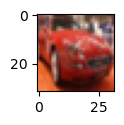

In [10]:
plot_sample(5)

In [11]:
# creating labels to make outputs easier to test
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

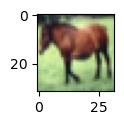

In [12]:
plot_sample(7)

In [13]:
classes[y_train[7][0]]

'horse'

## Prepocessing images  

In [14]:
#processing the images by scaling them in the range of 0 to 1
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [15]:
#using one hot encoding to make it easier to model the data
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [16]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [17]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Model building 

In [20]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=1)

2022-09-22 17:10:47.172969: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 16s 10ms/step - loss: 1.8109 - accuracy: 0.3534


In [21]:
#making predictions
np.argmax(model.predict(X_test_scaled)[0])

313/313 [==============================] - 1s 3ms/step


3

In [22]:
y_test[0]

array([3], dtype=uint8)

In [23]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')    
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [24]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 43s 27ms/step - loss: 1.8122 - accuracy: 0.3555
43.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [25]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 16s 10ms/step - loss: 1.8088 - accuracy: 0.3537
16.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


You can see that running the model on the GPU results in a much faster processing speed. 
This becomes more noticeable the larger the model becomes and the more epochs you run it for.

In [26]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.8097 - accuracy: 0.3554
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.6237 - accuracy: 0.4257
Epoch 3/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.5428 - accuracy: 0.4540
Epoch 4/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.4809 - accuracy: 0.4811
Epoch 5/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.4334 - accuracy: 0.4969
Epoch 6/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.3882 - accuracy: 0.5139
Epoch 7/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.3493 - accuracy: 0.5265
Epoch 8/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.3154 - accuracy: 0.5392
Epoch 9/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.2828 - accuracy: 0.5508
Epoch 10/10
1563/1563 [==============================] - 42s 27m

In [27]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.8146 - accuracy: 0.3523
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6241 - accuracy: 0.4273
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5436 - accuracy: 0.4563
Epoch 4/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.4810 - accuracy: 0.4784
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4341 - accuracy: 0.4960
Epoch 6/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.3894 - accuracy: 0.5136
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.3516 - accuracy: 0.5251
Epoch 8/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3152 - accuracy: 0.5385
Epoch 9/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2832 - accuracy: 0.5486
Epoch 10/10
1563/1563 [==============================] - 14s 9ms/st

# Findings
In this test, I ran the model for 10 epochs on both the CPU and GPU.  
You can see that on the CPU it took **6min 48s** while on the CPU it took **2min 29s**.  
The GPU turned out to be 274% faster than the CPU.

> Keep in mind the processing the times will differ each time the model is run. But after running the program several times the GPU was on average 270% faster than the CPU